In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('Train (3).csv')
df_test = pd.read_csv('Test (1).csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train['source'] = 'train'
df_test['source'] = 'test'
df_test['Item_Outlet_Sales'] = 0
data = pd.concat([df_train,df_test],sort = False)


In [6]:
data.shape

(14204, 13)

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0,test


In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
null_var = data.isnull().sum()/data.shape[0]*100

In [11]:
null_var

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
source                        0.000000
dtype: float64

In [12]:
for i in null_var.keys().to_list():
    if data[i].dtypes == 'int64':
        data[i].fillna(data[i].mean(),inplace = True)
    elif data[i].dtypes == 'float64':
        data[i].fillna(data[i].mean(),inplace = True)
    
    

In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [14]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace = True)

In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [16]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [17]:
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [18]:
missing_values = (data['Item_Visibility']==0)
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])

In [19]:
missing_values = (data['Item_Visibility']==0)

In [20]:
missing_values.sum()

0

In [21]:
for var in data.select_dtypes(include = "O").keys().to_list():
    print(data[var].value_counts())

FDZ48    10
FDQ14    10
FDA13    10
FDJ33    10
FDN03    10
         ..
FDR51     7
FDM50     7
FDL50     7
FDO33     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

In [22]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])

In [23]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})


In [24]:
data.drop('Item_Identifier',axis = 1,inplace = True)

In [25]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace =True)

In [28]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
data['Item_Fat_Content']= data['Item_Fat_Content'].astype(str)

In [30]:
data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2020-x)


In [31]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,11
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,21
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,22
4,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,33


# EDA

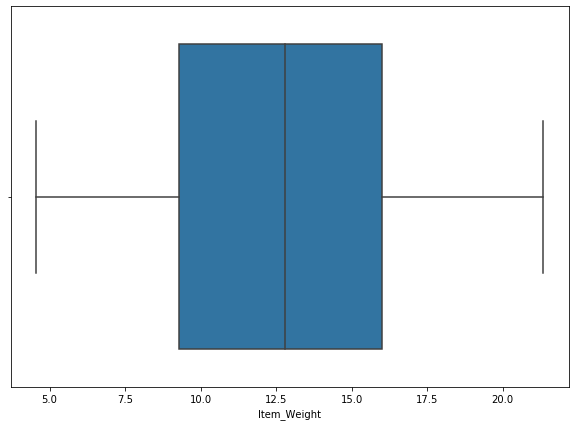

In [32]:
plt.figure(figsize = (10,7))
sns.boxplot('Item_Weight',data =data)

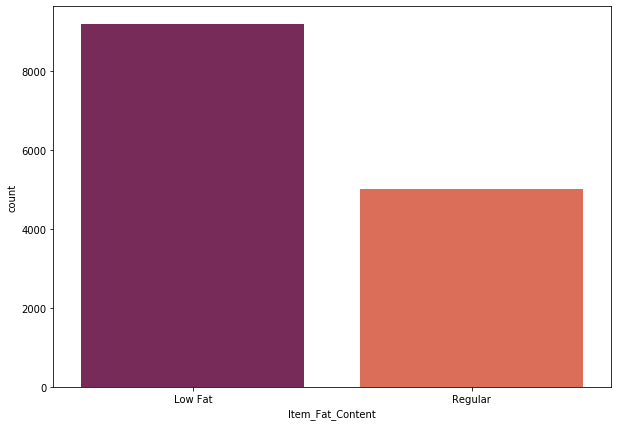

In [33]:
plt.figure(figsize = (10,7))
sns.countplot('Item_Fat_Content',data = data,palette="rocket")

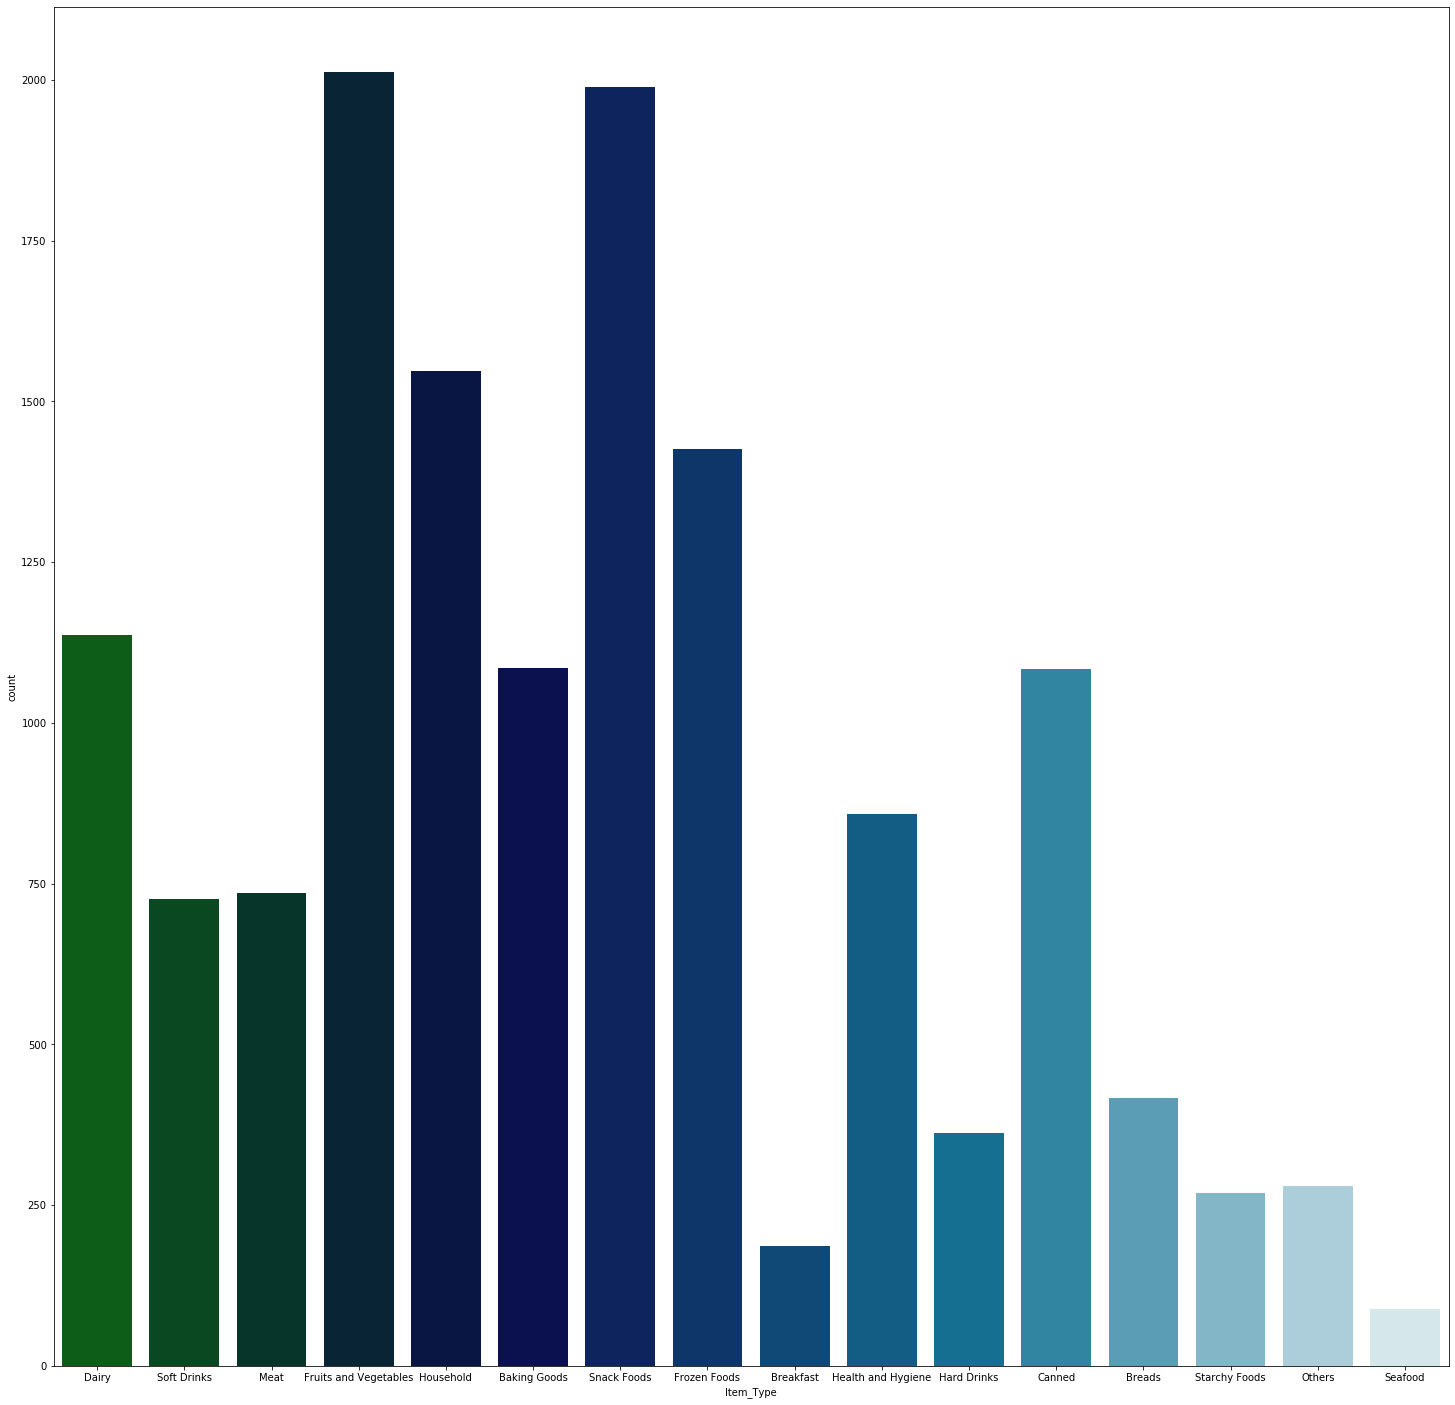

In [34]:
plt.figure(figsize = (25,25))
sns.countplot('Item_Type',data = data,palette="ocean")
plt.show()

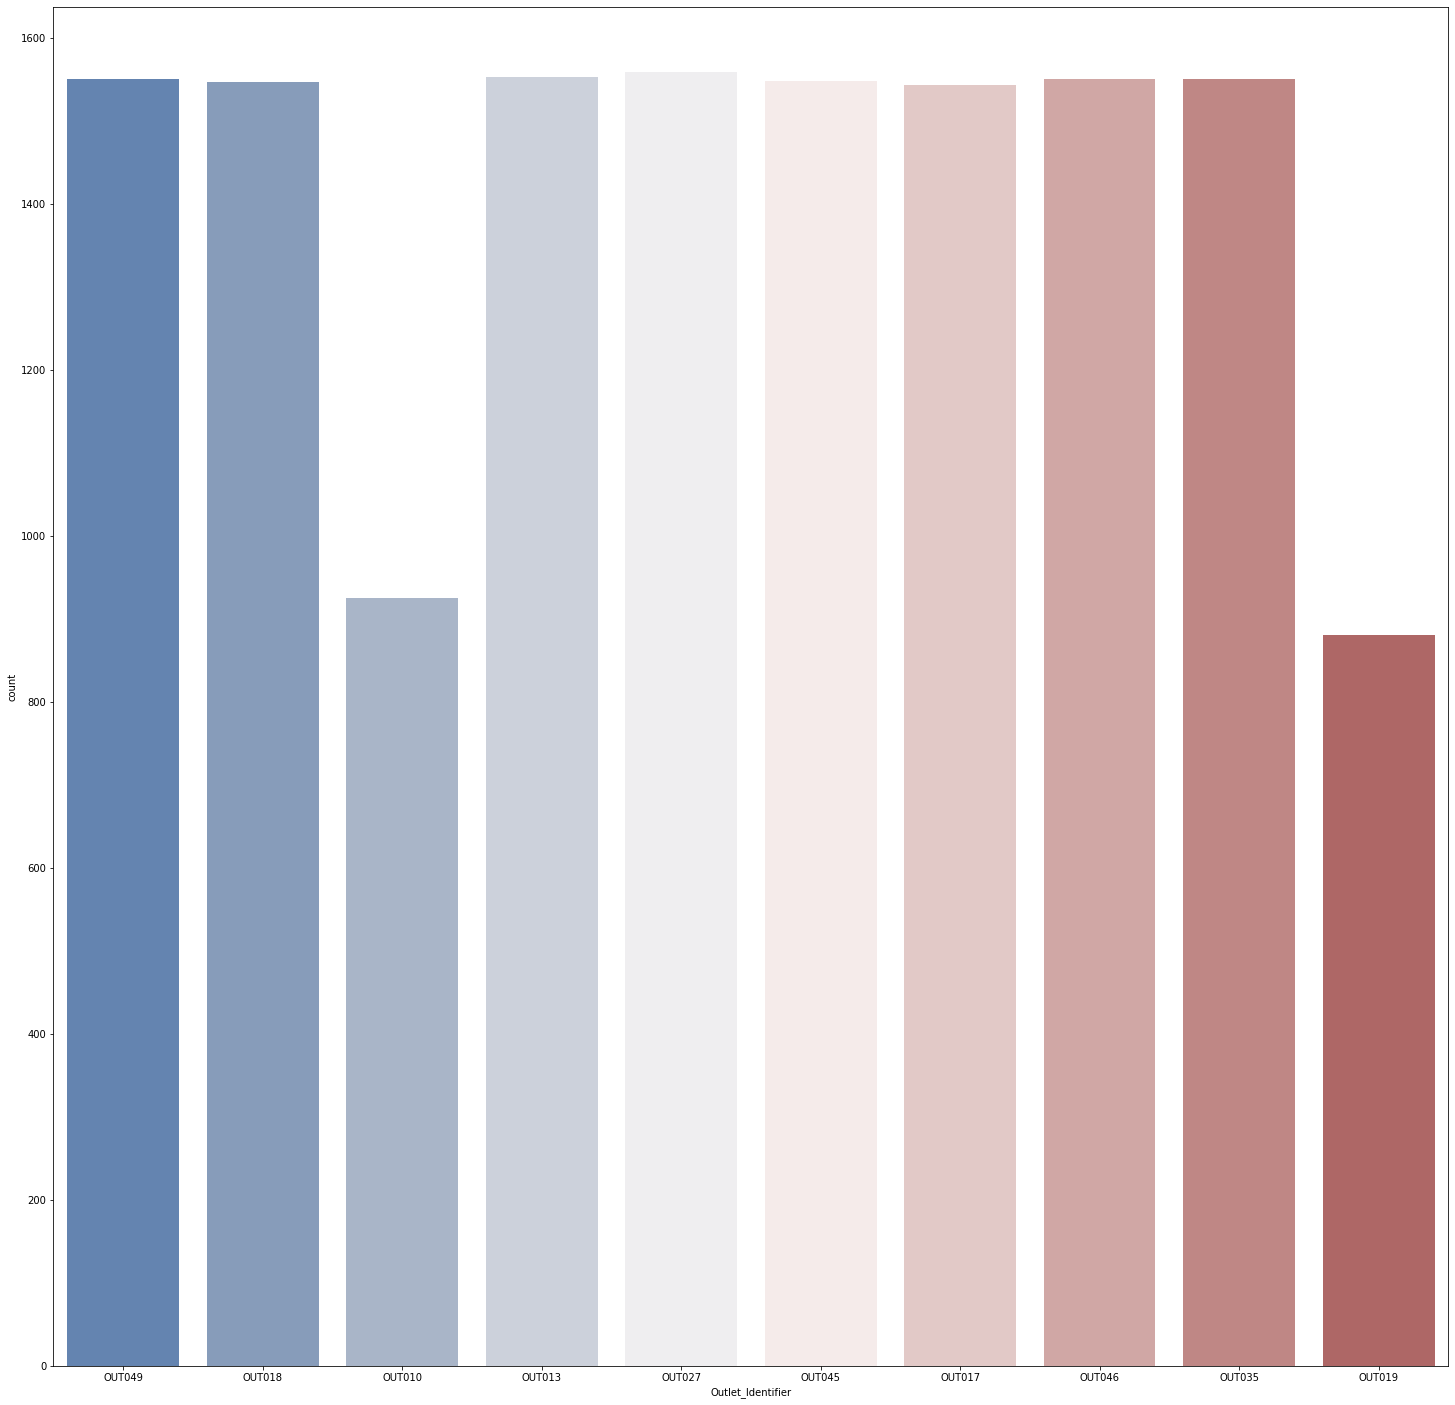

In [35]:
plt.figure(figsize = (25,25))
sns.countplot('Outlet_Identifier',data = data,palette="vlag")
plt.show()

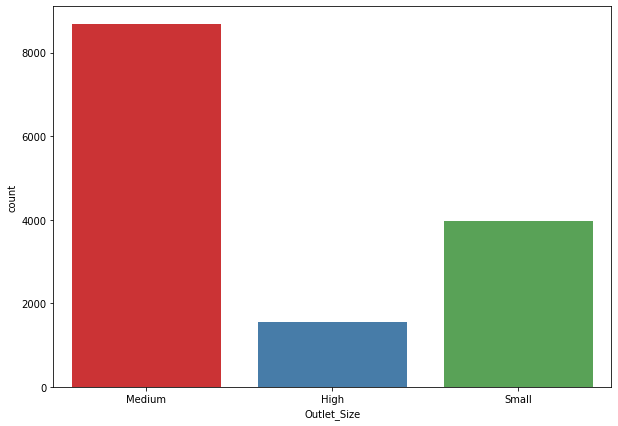

In [36]:
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Size',data = data,palette="Set1")
plt.show()

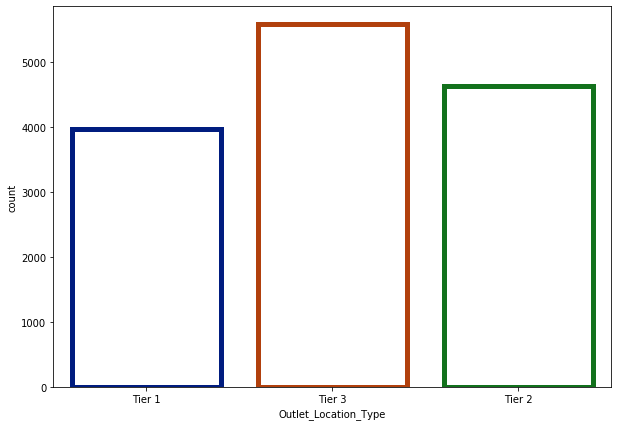

In [37]:
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Location_Type',data = data,edgecolor=sns.color_palette("dark", 3),linewidth = 5,facecolor=(0, 0,0,0))
plt.show()

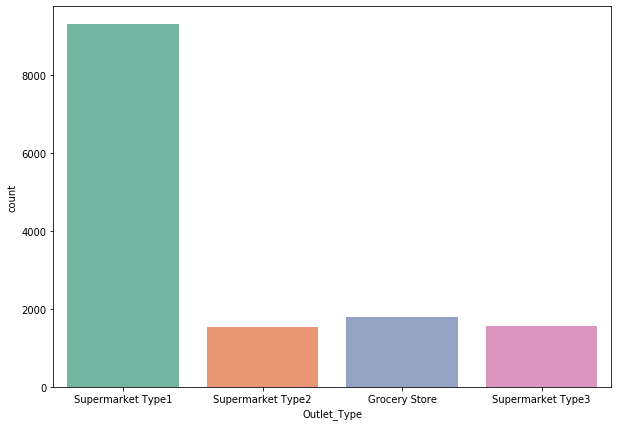

In [38]:
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type',data = data,palette="Set2")
plt.show()

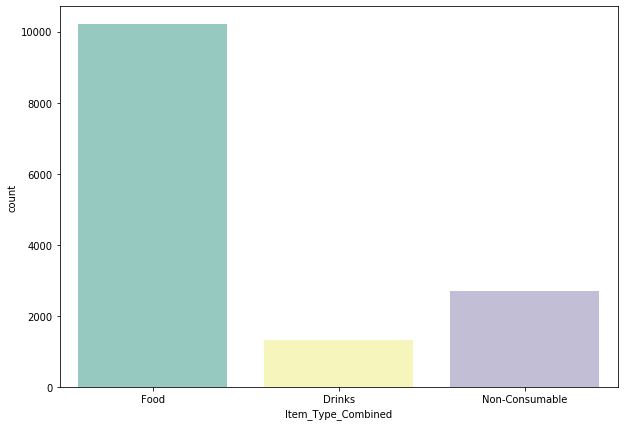

In [39]:
plt.figure(figsize = (10,7))
sns.countplot('Item_Type_Combined',data = data,palette="Set3")
plt.show()

In [40]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source', 'Item_Type_Combined',
       'Years_Established'],
      dtype='object')

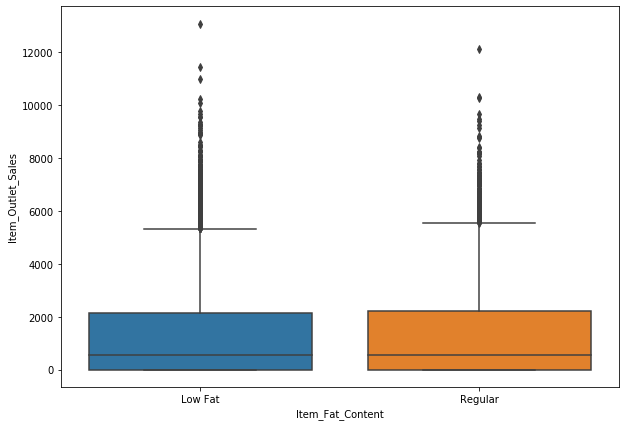

In [47]:
plt.figure(figsize = (10,7))
sns.boxplot(y ='Item_Outlet_Sales',x= 'Item_Fat_Content' ,data=data )

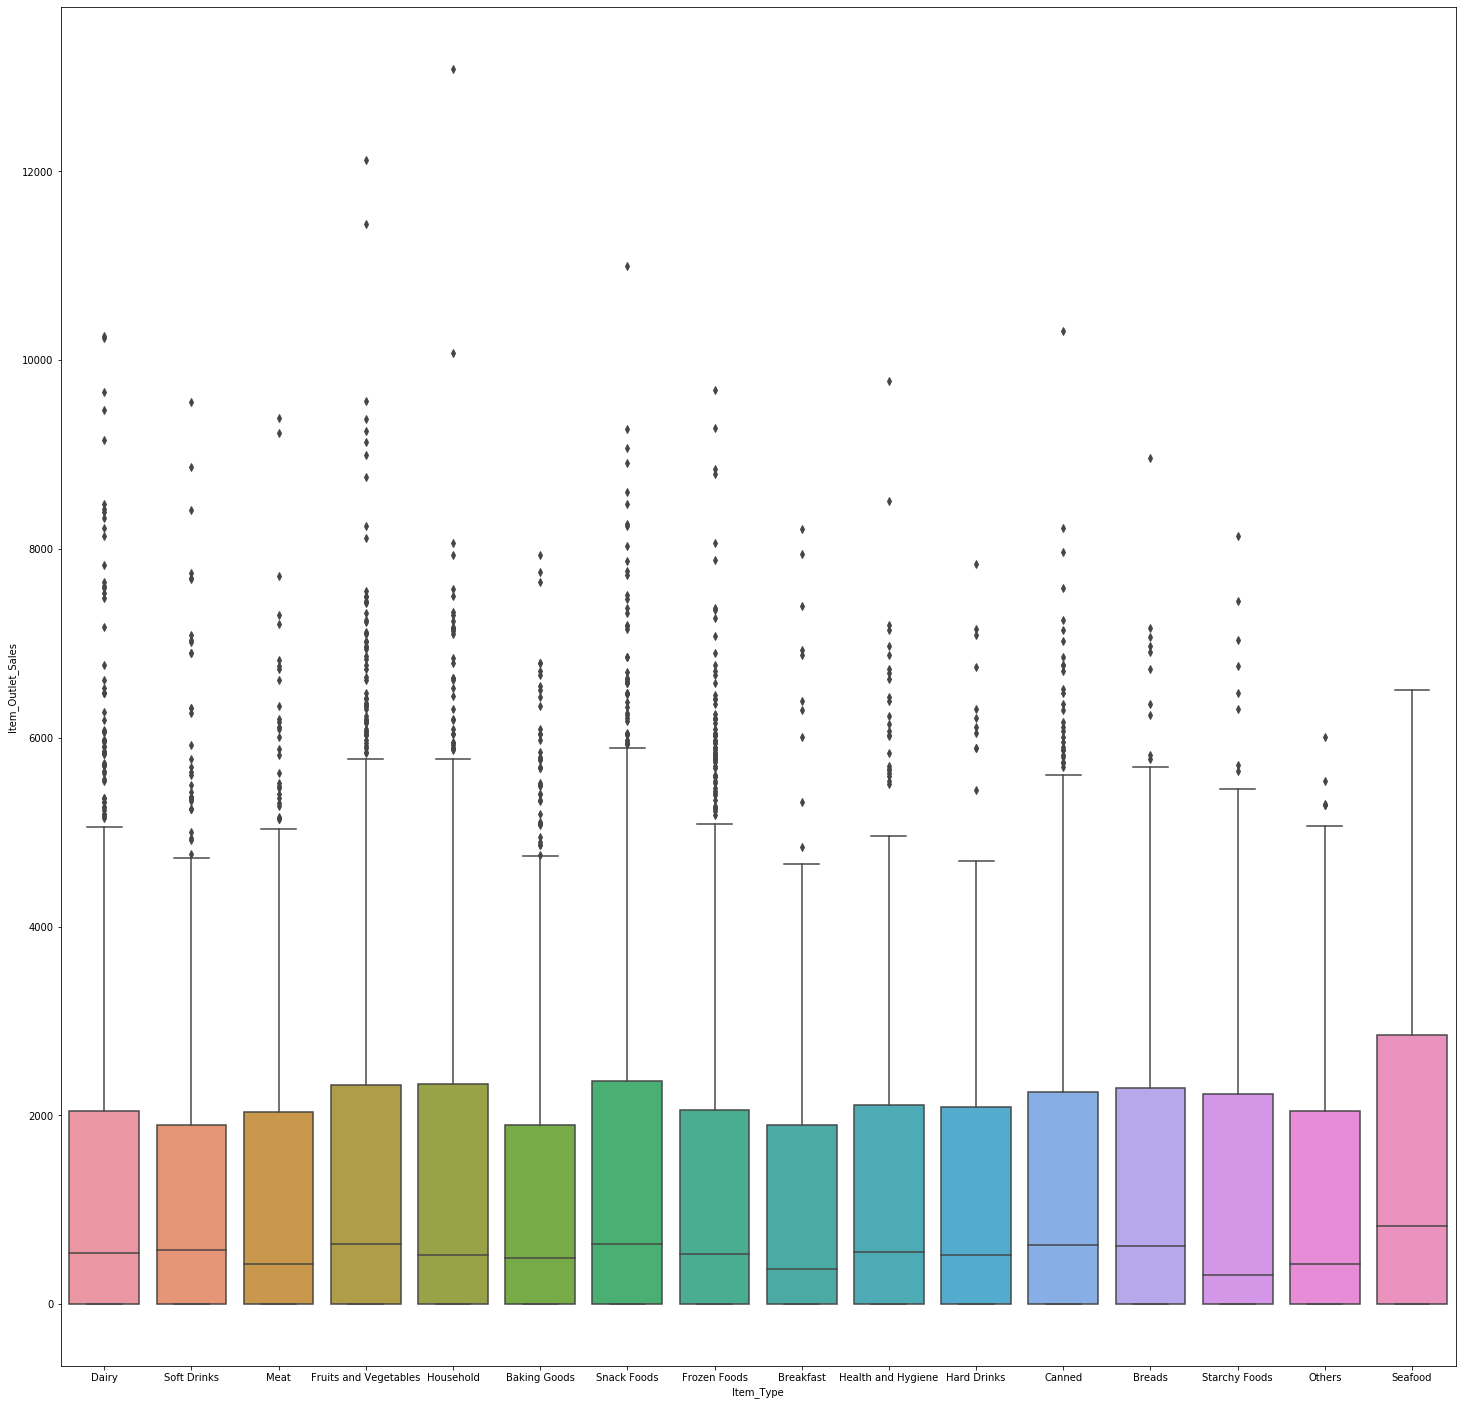

In [48]:
plt.figure(figsize = (25,25))
sns.boxplot(y ='Item_Outlet_Sales',x= 'Item_Type' ,data=data )

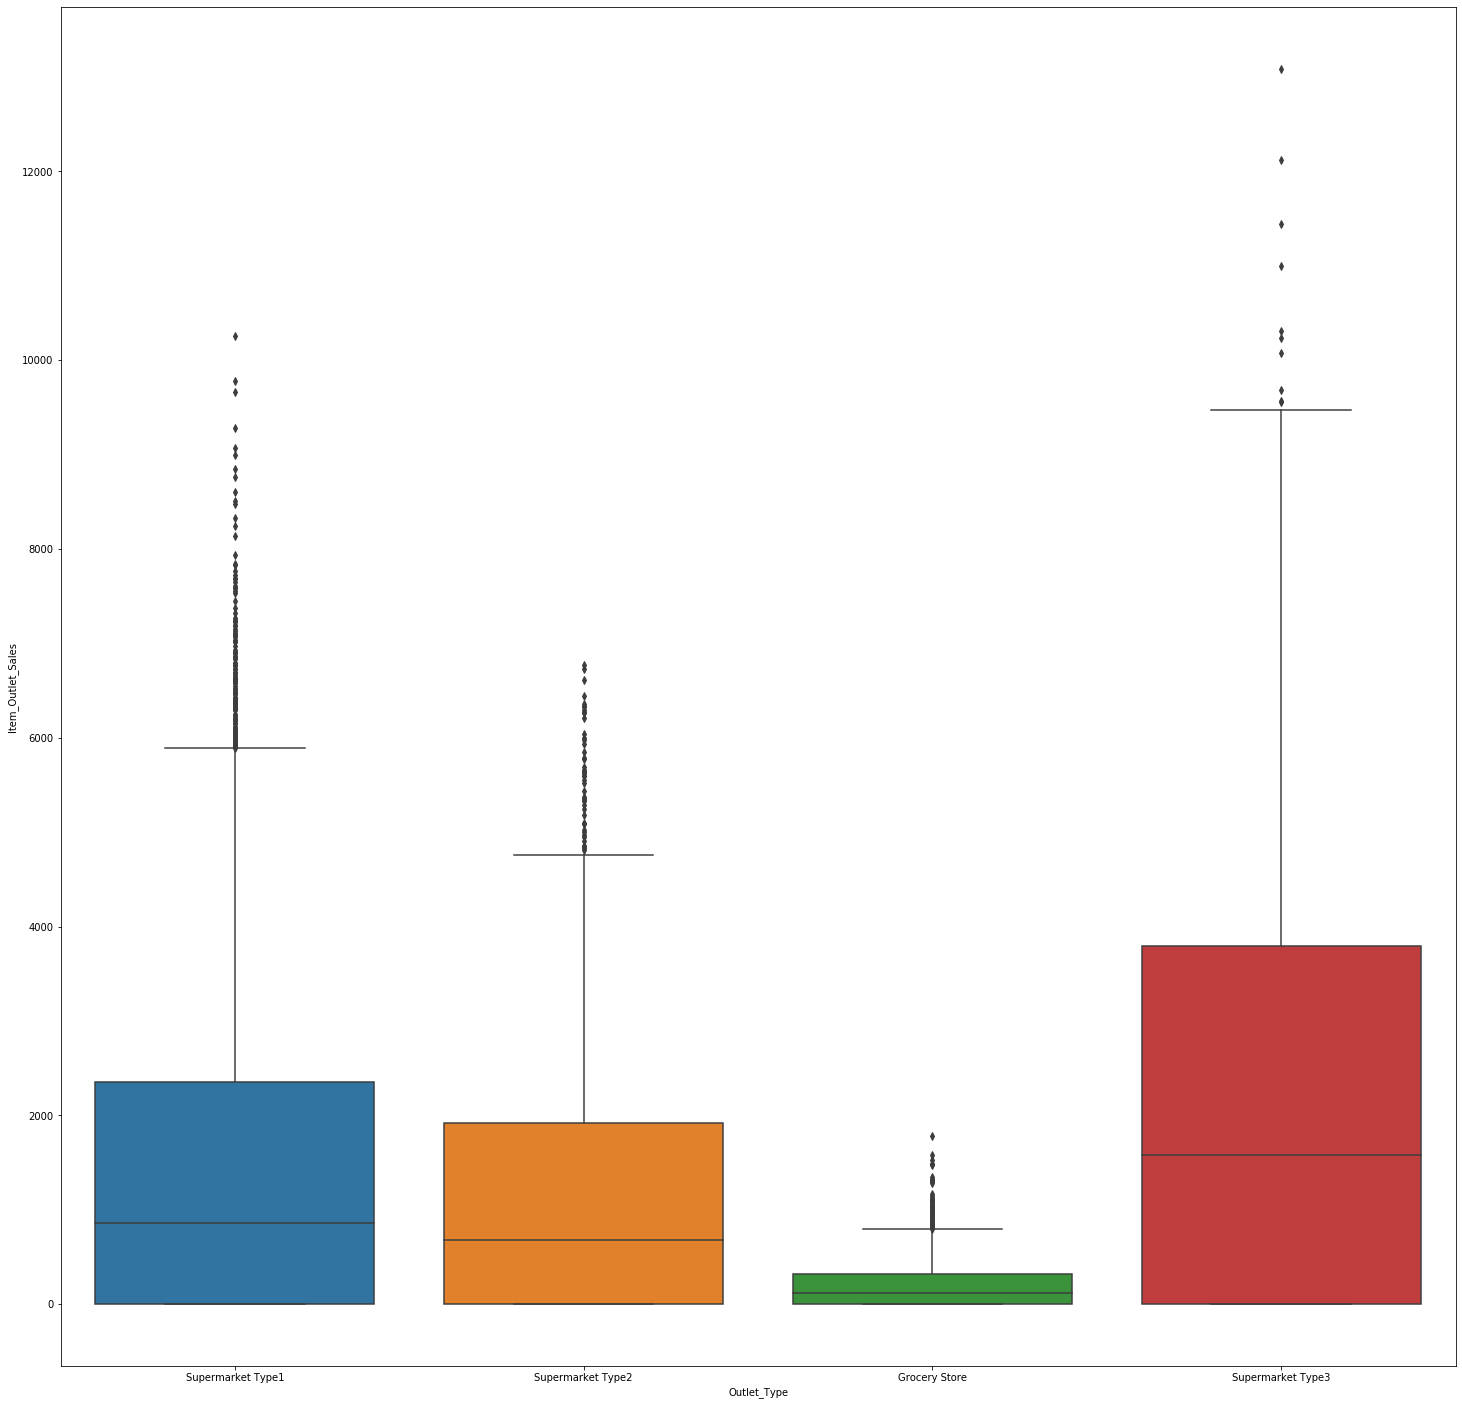

In [46]:
plt.figure(figsize = (25,25))
sns.boxplot(y ='Item_Outlet_Sales',x= 'Outlet_Type' ,data=data )

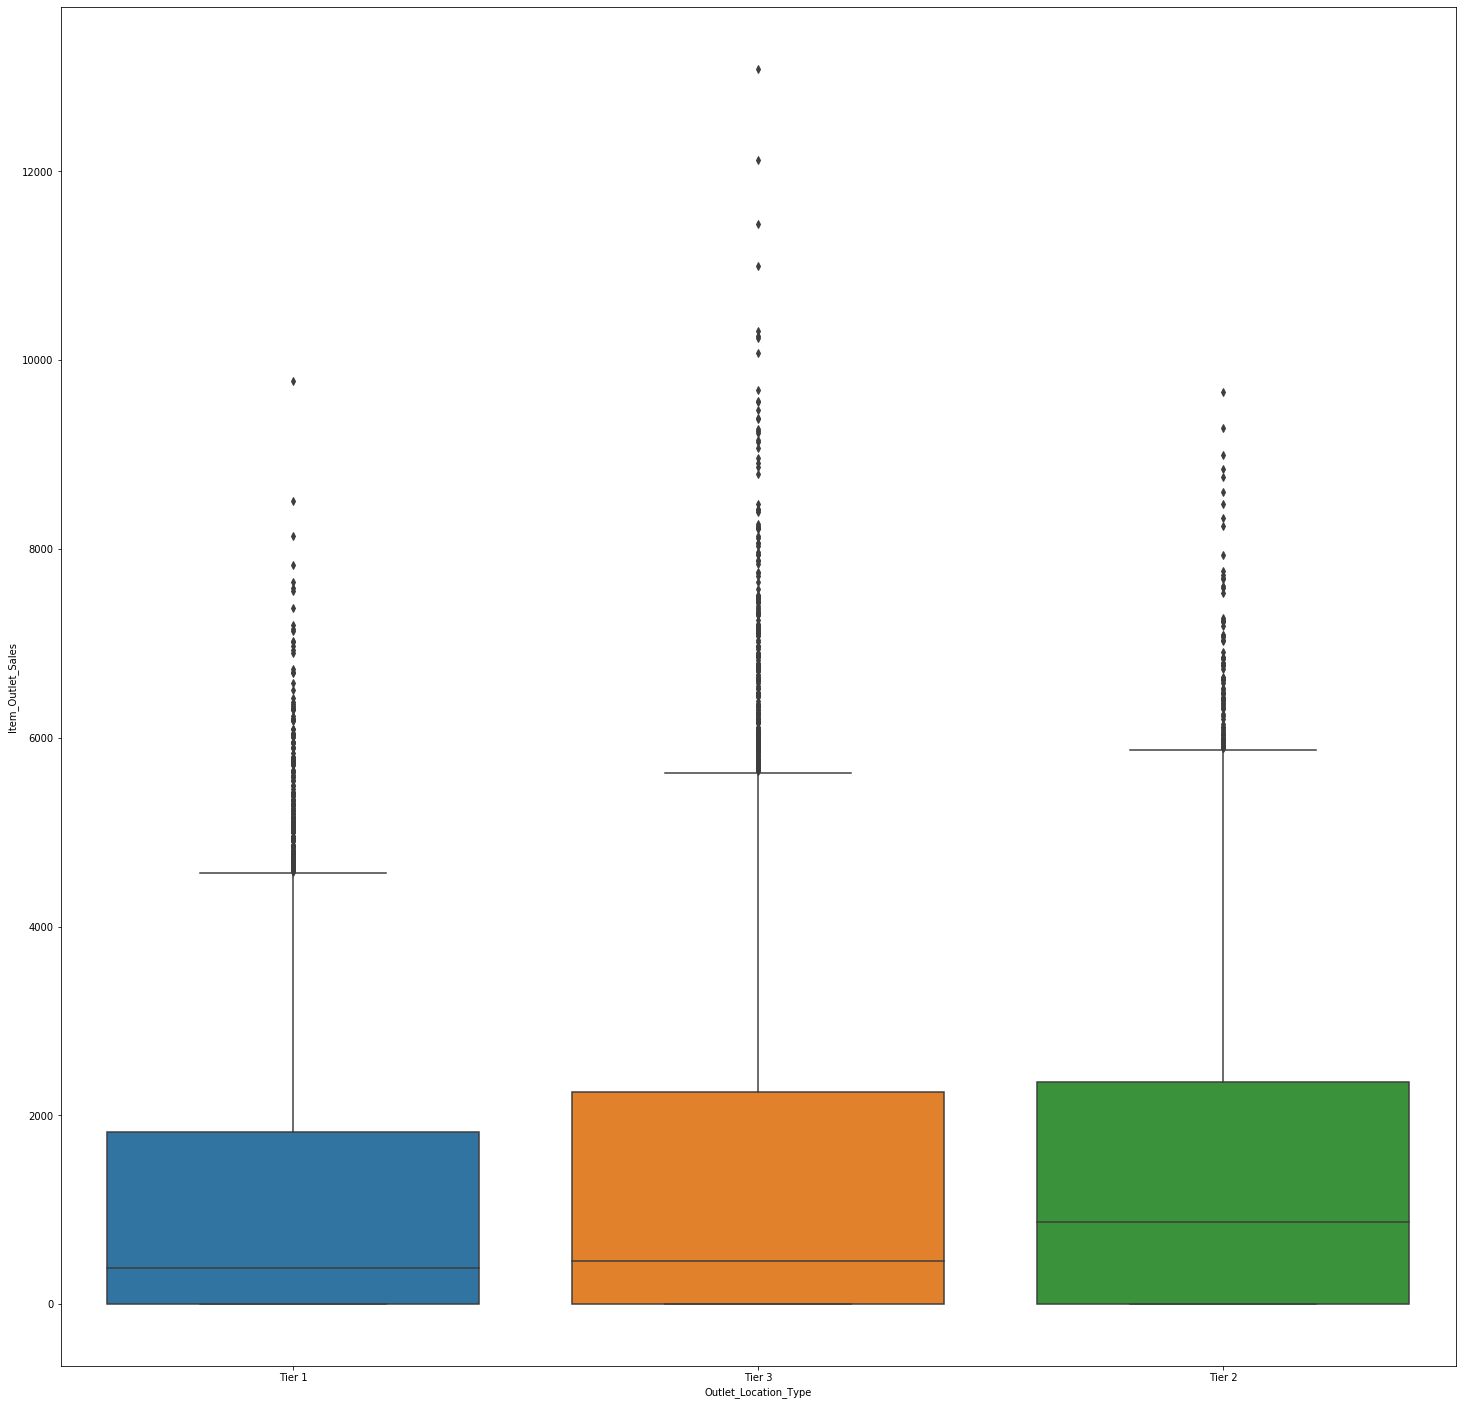

In [49]:
plt.figure(figsize = (25,25))
sns.boxplot(y ='Item_Outlet_Sales',x= 'Outlet_Location_Type' ,data=data )

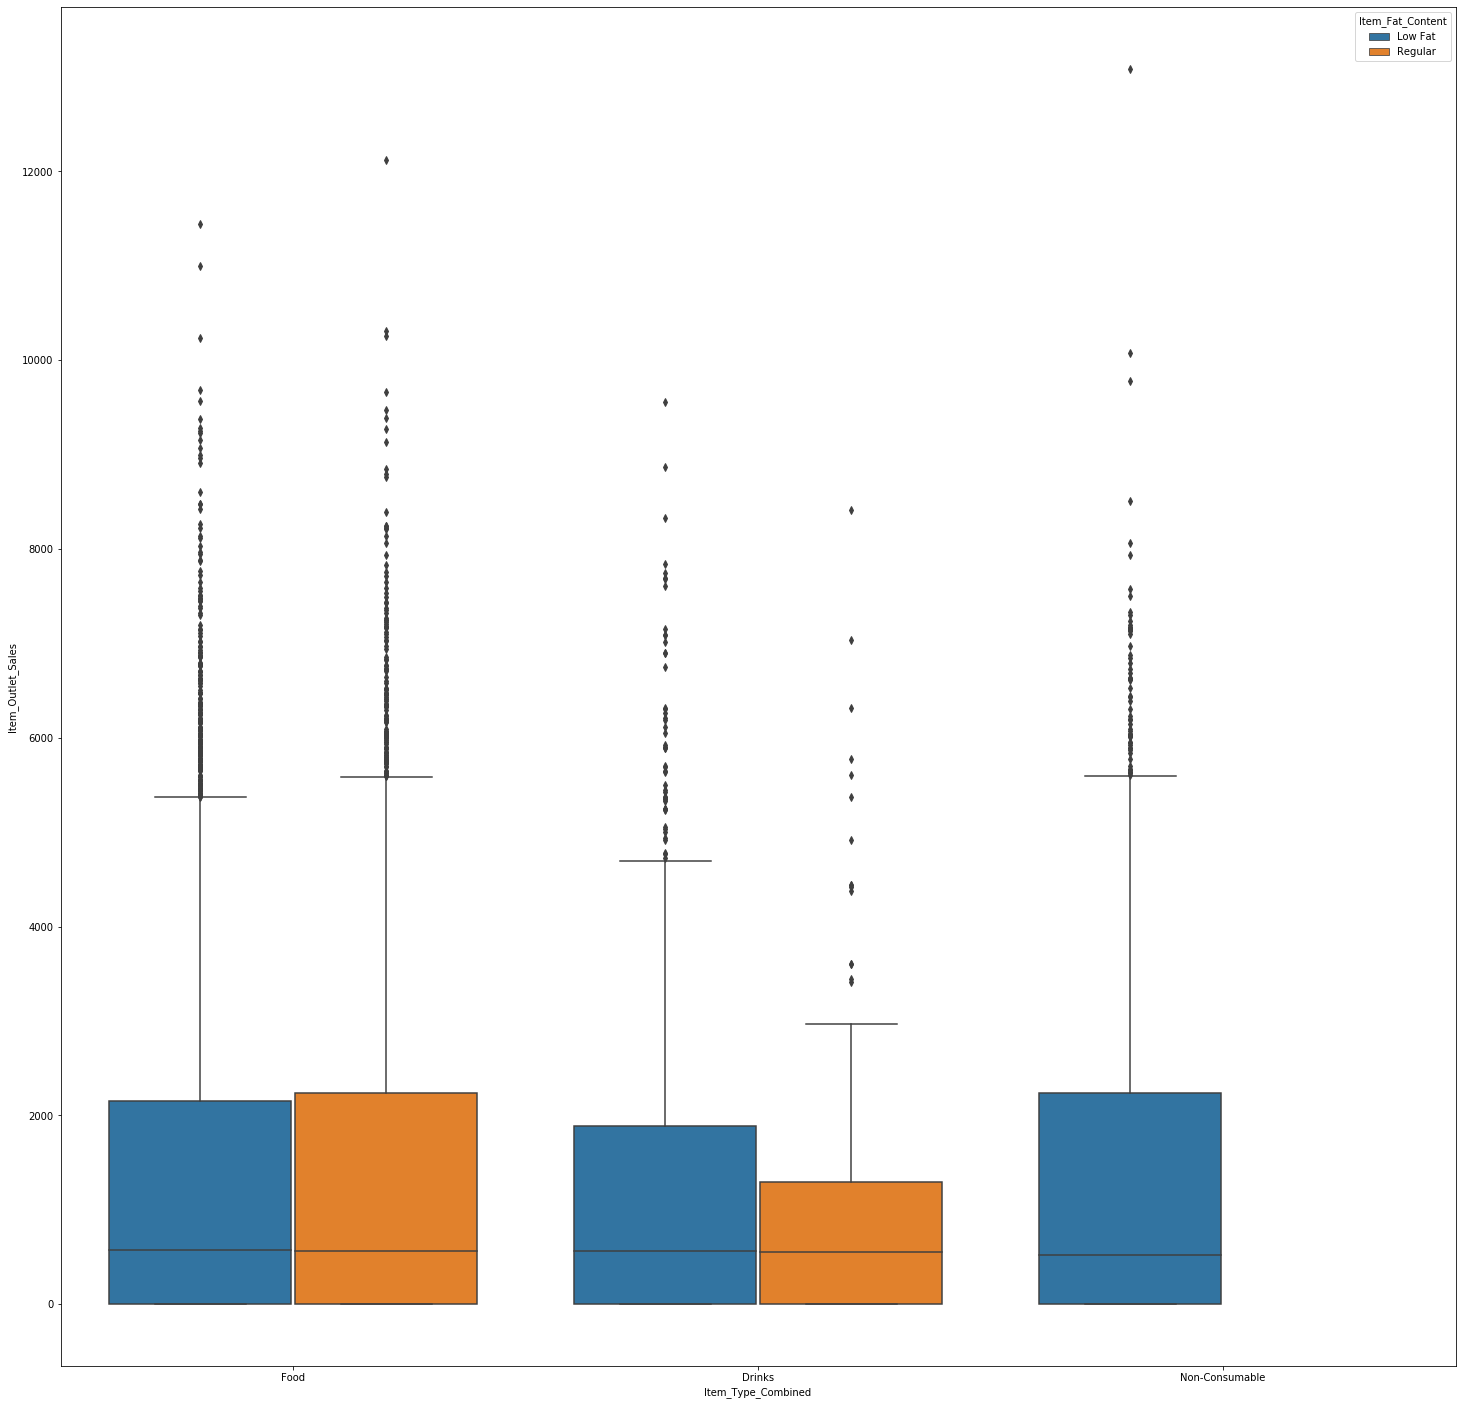

In [51]:
plt.figure(figsize = (25,25))
sns.boxplot(y ='Item_Outlet_Sales',x= 'Item_Type_Combined',hue = 'Item_Fat_Content' ,data=data )

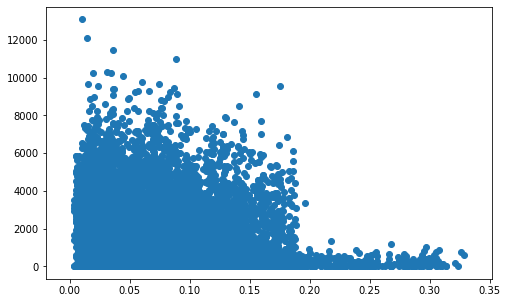

In [52]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=data)

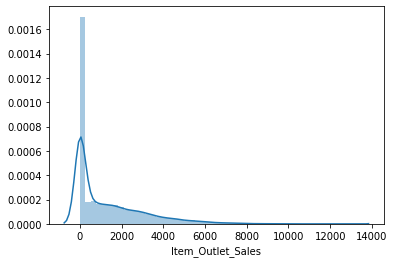

In [55]:
sns.distplot(data['Item_Outlet_Sales'])

Text(0, 0.5, 'Item Outlet Sales')

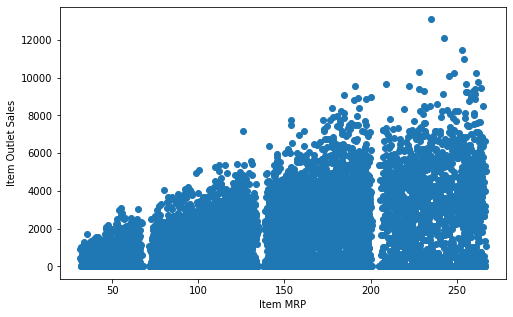

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')


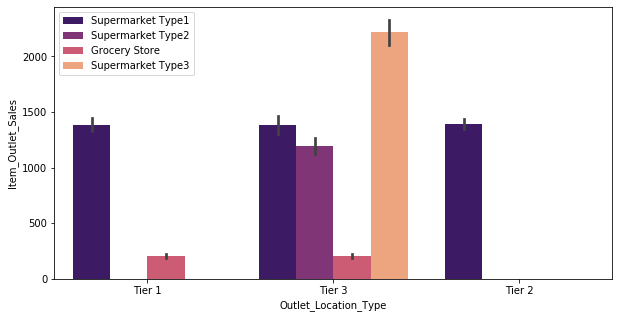

In [57]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

In [58]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,11
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,21
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,22
4,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,33


In [59]:
data.corr()['Item_Outlet_Sales']

Item_Weight                  0.016425
Item_Visibility             -0.074001
Item_MRP                     0.342781
Outlet_Establishment_Year   -0.029489
Item_Outlet_Sales            1.000000
Years_Established            0.029489
Name: Item_Outlet_Sales, dtype: float64

In [60]:
data.drop(['Outlet_Establishment_Year','Outlet_Identifier'],axis = 1,inplace = True)

In [61]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,11
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,21
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,train,Food,22
4,8.93,Low Fat,0.009780,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,33


In [62]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [70]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Combined', 'Years_Established'],
      dtype='object')

In [64]:
train.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_Established
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,train,Food,33
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,train,Food,18
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,train,Non-Consumable,16
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,train,Food,11
8522,14.800,Low Fat,0.044878,Soft Drinks,75.4670,Small,Tier 1,Supermarket Type1,765.6700,train,Drinks,23


In [72]:
train1 = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Combined', 'Years_Established']]

In [73]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,22
4,8.93,Low Fat,0.009780,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


In [74]:
test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source', 'Item_Type_Combined',
       'Years_Established'],
      dtype='object')

In [75]:
test1 = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined',
       'Years_Established']]

In [76]:
print(train1.shape,test1.shape)

(8523, 11) (5681, 10)


In [77]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Type_Combined']
for i in var_mod:
    train1[i] = le.fit_transform(train1[i])
for i in var_mod:
    test1[i] = le.fit_transform(test1[i])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,1,21
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,0,11
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,1,21
3,19.20,1,0.017834,6,182.0950,1,2,0,732.3800,1,22
4,8.93,0,0.009780,9,53.8614,0,2,1,994.7052,2,33


In [82]:
test1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Years_Established
0,20.750000,0,0.007565,13,107.8622,1,0,1,1,21
1,8.300000,1,0.038428,4,87.3198,1,1,1,1,13
2,14.600000,0,0.099575,11,241.7538,1,2,0,2,22
3,7.315000,0,0.015388,13,155.0340,1,1,1,1,13
4,12.792854,1,0.118599,4,234.2300,1,2,3,1,35


In [87]:
X = train1.drop('Item_Outlet_Sales',axis = 1)
y = train1['Item_Outlet_Sales']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lr.score(x_test,y_test)

0.5018418246671515

In [92]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=500,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(x_train,y_train)

# Making Predictions


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=4, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [102]:
RF.score(x_test,y_test)

0.591117560228124